Please upload the `Cardetails.csv` file. You can use the file upload button in the left sidebar or drag and drop the file into the notebook.

name              object
year               int64
selling_price      int64
km_driven        float64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object
Missing values per column:
name                0
year                0
selling_price       0
km_driven         813
fuel                0
seller_type         0
transmission        0
owner               0
mileage          1011
engine           1008
max_power         215
torque            222
seats             221
dtype: int64
Number of duplicate rows: 862
Number of rows after removing duplicates: 7266
outliers removed
outliers removed
outliers removed
outliers removed


/tmp/ipython-input-1585570619.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median, inplace=True)
/tmp/ipython-input-1585570619.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

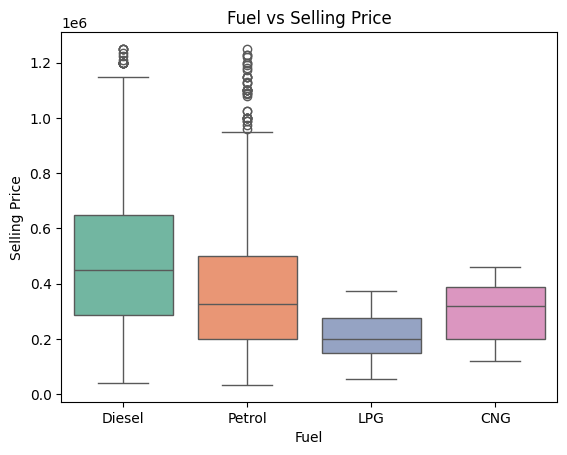

/tmp/ipython-input-1585570619.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['selling_price'], palette="Set2")


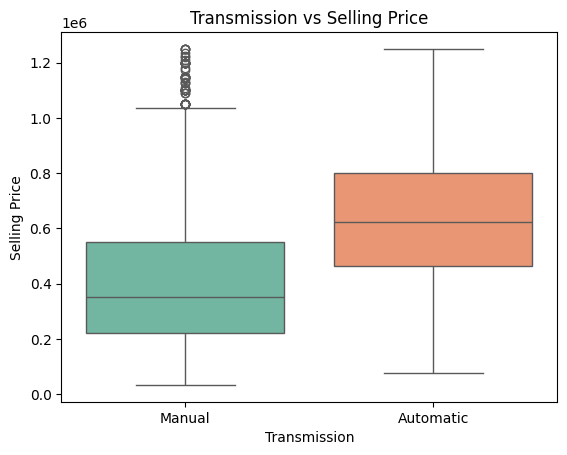

/tmp/ipython-input-1585570619.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['selling_price'], palette="Set2")


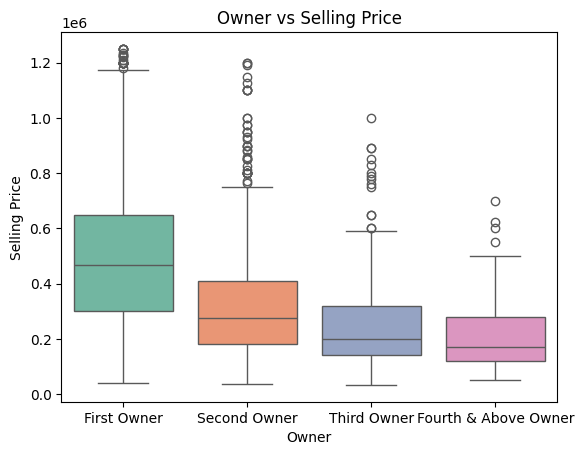

                          name         year  selling_price      km_driven  \
count                     5397  5397.000000   5.397000e+03    5397.000000   
unique                    1438          NaN            NaN            NaN   
top     Maruti Swift Dzire VDI          NaN            NaN            NaN   
freq                       121          NaN            NaN            NaN   
mean                       NaN  2013.630535   4.173411e+05   65362.568093   
std                        NaN     3.777525   2.368585e+05   35964.379594   
min                        NaN  2002.000000   3.335100e+04       1.000000   
25%                        NaN  2011.000000   2.299990e+05   40000.000000   
50%                        NaN  2014.000000   3.750000e+05   60000.000000   
75%                        NaN  2017.000000   5.700000e+05   90000.000000   
max                        NaN  2020.000000   1.250000e+06  182000.000000   

          fuel seller_type transmission        owner    mileage   engine  \

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.283e+12, tolerance: 2.425e+10
  model = cd_fast.enet_coordinate_descent(



Model Performance Summary:

            Model     R²       MAE          MSE  Accuracy  Precision  Recall  F1 Score
    Random Forest 0.7920  77725.77 1.153821e+10    0.7611     0.7656  0.7611    0.7538
Gradient Boosting 0.8898  57397.44 6.111788e+09    0.8185     0.8226  0.8185    0.8156
    Decision Tree 0.7757  79439.97 1.244224e+10    0.7583     0.7552  0.7583    0.7543
Linear Regression 0.8958  53270.79 5.781649e+09    0.8278     0.8384  0.8278    0.8325
 Lasso Regression 0.8934  53033.51 5.915684e+09    0.8278     0.8378  0.8278    0.8321
 Ridge Regression 0.9071  51250.17 5.155052e+09    0.8343     0.8459  0.8343    0.8383
    KNN Regressor 0.5716 106434.40 2.376602e+10    0.6963     0.7269  0.6963    0.6902


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    r2_score, mean_absolute_error, mean_squared_error,
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix
)
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import randint, uniform



df = pd.read_csv("Cardetails.csv")
#data types
print(df.dtypes)
print("Missing values per column:")
print(df.isnull().sum())

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    median = df[col].median()
    df[col].fillna(median, inplace=True)

for col in df.select_dtypes(include=['object']).columns:
    mode = df[col].mode()[0]
    df[col].fillna(mode, inplace=True)
 #DUPLICATES
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

df = df.drop_duplicates()
print(f"Number of rows after removing duplicates: {df.shape[0]}")
#outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5 *IQR
    upper_bound = Q3+1.5 *IQR
    return df[(df[column]>= lower_bound)&(df[column]<=upper_bound)]

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df = remove_outliers(df, col)
    print("outliers removed")

#scale encoding
X = df.drop("selling_price", axis=1)
y = df["selling_price"]
X = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
num_cols = X.select_dtypes(include=['float64', 'int64']).columns[:2]
X[num_cols] = scaler.fit_transform(X[num_cols])

categorical_features = ['fuel', 'transmission', 'owner']

for col in categorical_features:
    plt.figure()
    sns.boxplot(x=df[col], y=df['selling_price'], palette="Set2")
    plt.title(f"{col.capitalize()} vs Selling Price")
    plt.xlabel(col.capitalize())
    plt.ylabel("Selling Price")
    plt.show()

#training and testing split
X = df.drop("selling_price", axis=1)
y = df["selling_price"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=50
)
print(df.describe(include='all'))
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

#converting cat to num
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
rf_params = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 15),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

dt_params = {
    'max_depth': randint(3, 15),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

gb_params = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

rf_search = RandomizedSearchCV(RandomForestRegressor(random_state=50), rf_params, n_iter=5, cv=3, n_jobs=-1, random_state=50)
dt_search = RandomizedSearchCV(DecisionTreeRegressor(random_state=50), dt_params, n_iter=5, cv=3, n_jobs=-1, random_state=50)
gb_search = RandomizedSearchCV(GradientBoostingRegressor(random_state=50), gb_params, n_iter=5, cv=3, n_jobs=-1, random_state=50)

rf_search.fit(X_train, y_train)
dt_search.fit(X_train, y_train)
gb_search.fit(X_train, y_train)

best_rf = rf_search.best_estimator_
best_dt = dt_search.best_estimator_
best_gb = gb_search.best_estimator_

print("Best Random Forest Params:", rf_search.best_params_)
print("Best Decision Tree Params:", dt_search.best_params_)
print("Best Gradient Boosting Params:", gb_search.best_params_)

models = {
    "Random Forest": best_rf,
    "Gradient Boosting": best_gb,
    "Decision Tree": best_dt,
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(random_state=50),
    "Ridge Regression": Ridge(random_state=50),
    "KNN Regressor": KNeighborsRegressor()
}

bins = np.linspace(y.min(), y.max(), 5)
y_test_binned = np.digitize(y_test, bins)

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_binned = np.digitize(y_pred, bins)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    acc = accuracy_score(y_test_binned, y_pred_binned)
    prec = precision_score(y_test_binned, y_pred_binned, average='weighted', zero_division=0)
    rec = recall_score(y_test_binned, y_pred_binned, average='weighted', zero_division=0)
    f1 = f1_score(y_test_binned, y_pred_binned, average='weighted', zero_division=0)
    results.append({
        "Model": name,
        "R²": round(r2, 4),
        "MAE": round(mae, 2),
        "MSE": round(mse, 2),
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1 Score": round(f1, 4)
    })

results_df = pd.DataFrame(results)
print("\nModel Performance Summary:\n")
print(results_df.to_string(index=False))